In [45]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [46]:
# load the dataset
data= pd.read_csv("/Users/chaitanyadave/Desktop/Predict_Term_Deposit_Subscription/Predict_term_deposit/new_train.csv")

# check shape of dataset
print("shape of the data:", data.shape)
data.head()

shape of the data: (32950, 16)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [47]:
data = data.rename({'y': 'customer_subscription'}, axis=1)

In [48]:
# target class count
data["customer_subscription"].value_counts()

customer_subscription
no     29238
yes     3712
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer subscribed for a term deposit')

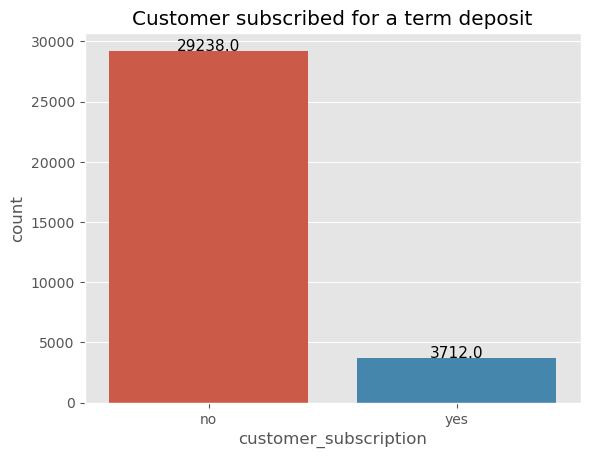

In [49]:
ax = sns.countplot(x='customer_subscription',data=data)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.title("Customer subscribed for a term deposit")

In [50]:
# indentifying the categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'customer_subscription'],
      dtype='object')


In [51]:
# replacing "unknown" with the mode
for column in cat_var:
    mode= data[column].mode()[0]
    data[column]= data[column].replace("unknown", mode)

In [52]:
# indentifying the numerical variables
num_var= data.select_dtypes(include= ["int64"]).columns
print(num_var)

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'customer_subscription'],
      dtype='object')


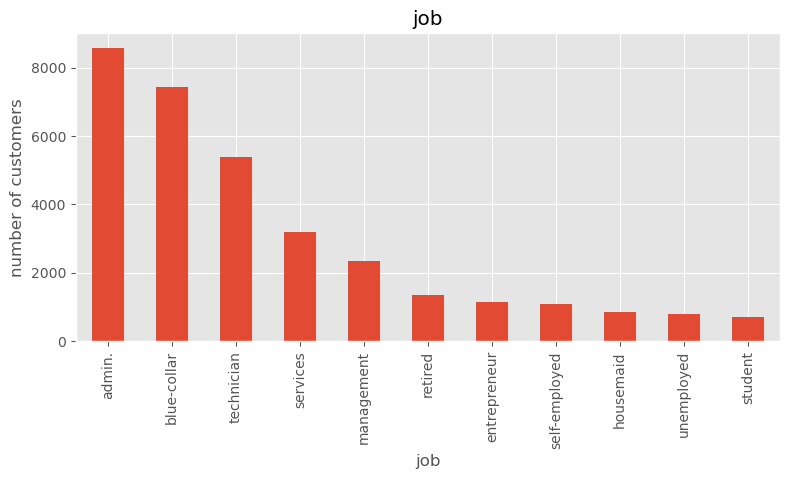

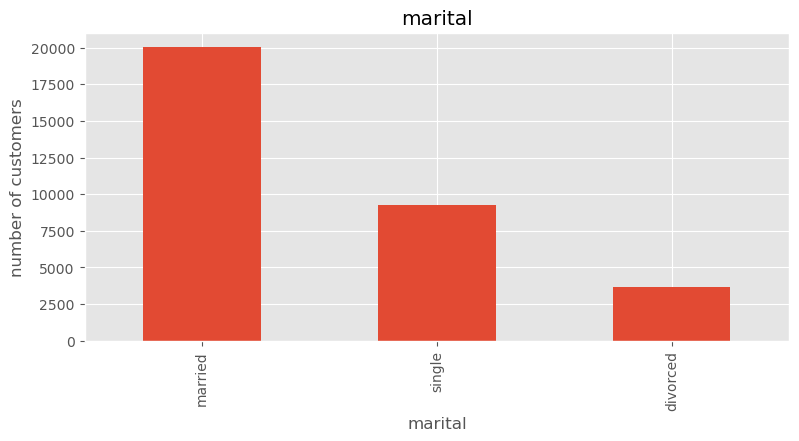

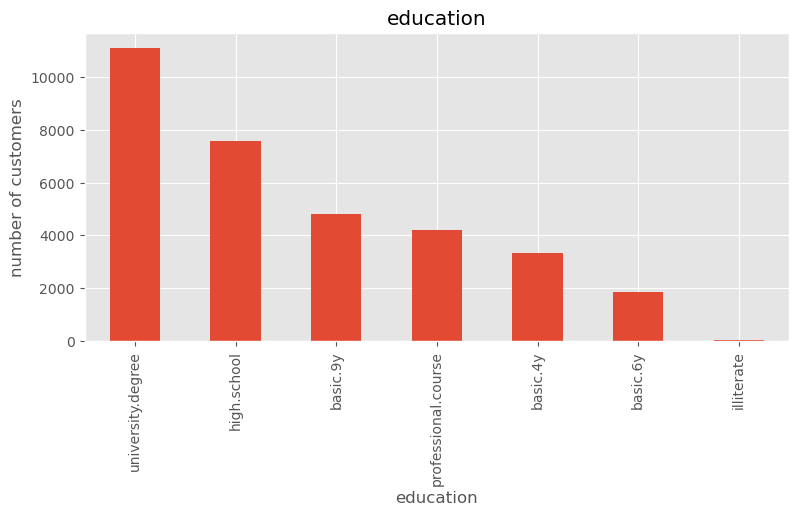

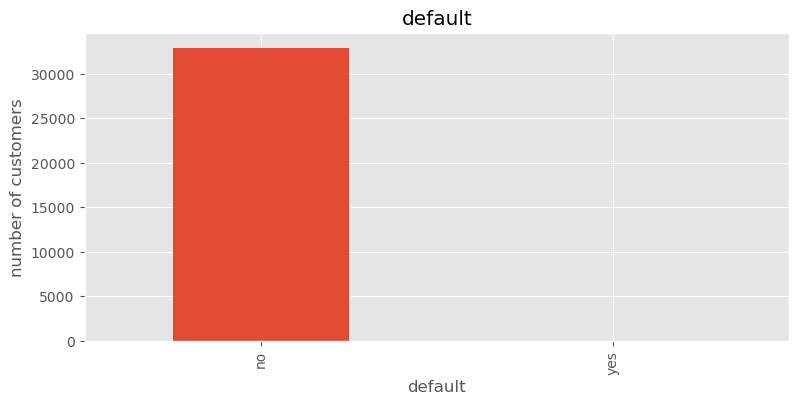

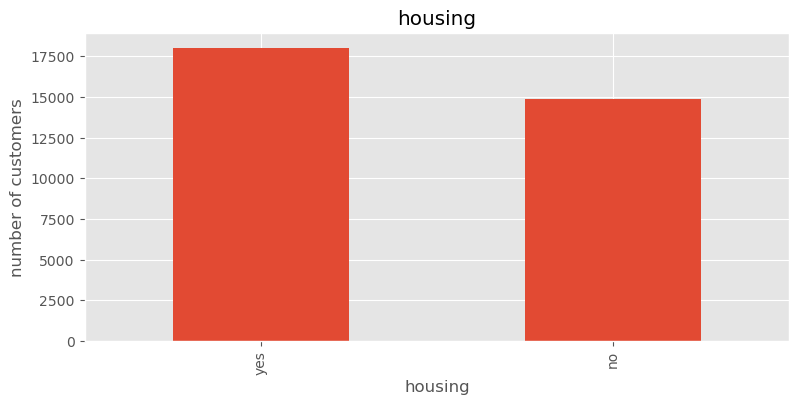

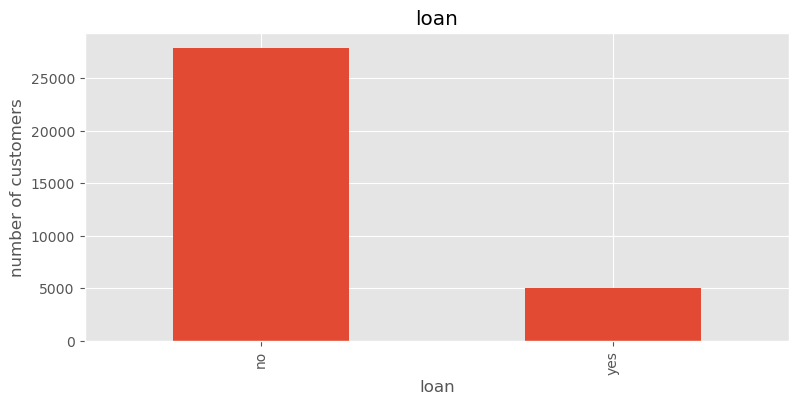

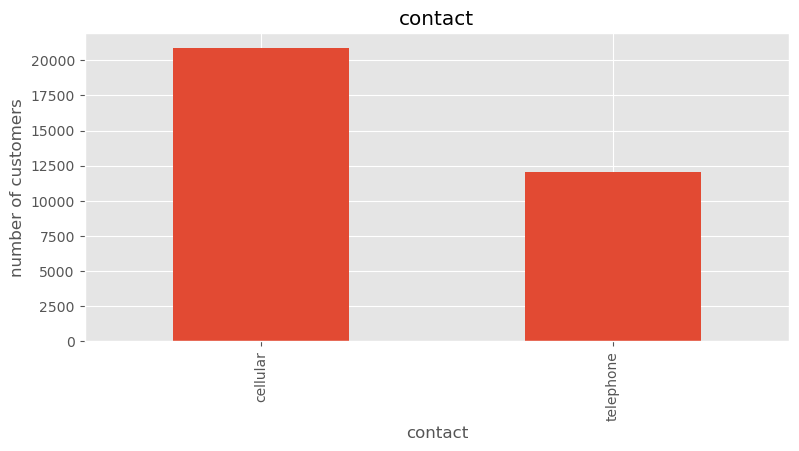

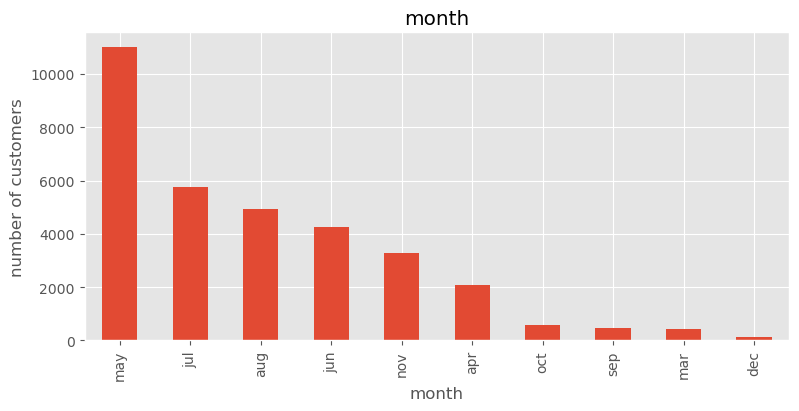

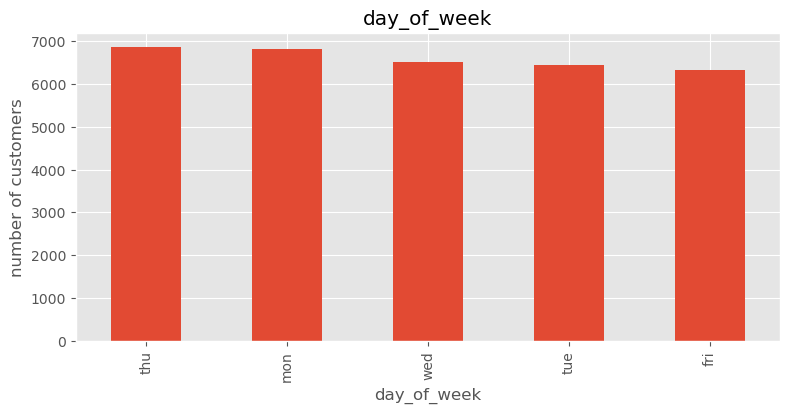

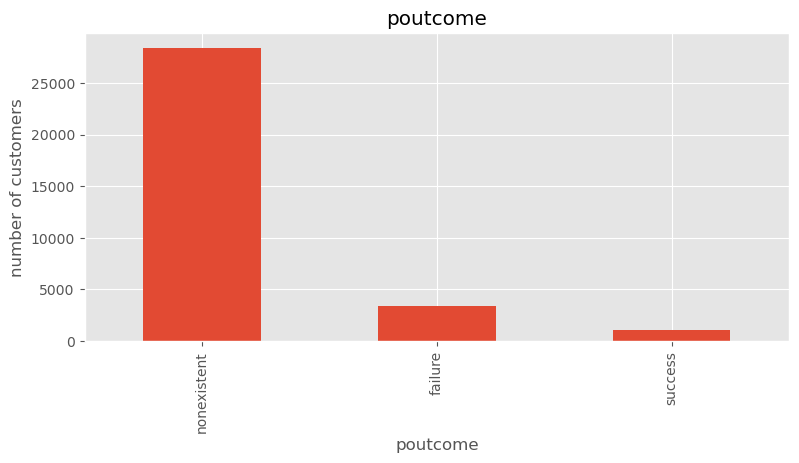

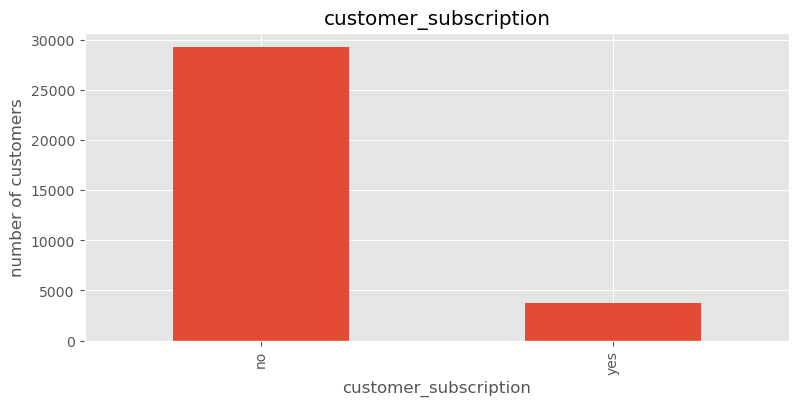

In [27]:
# indentifying the categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

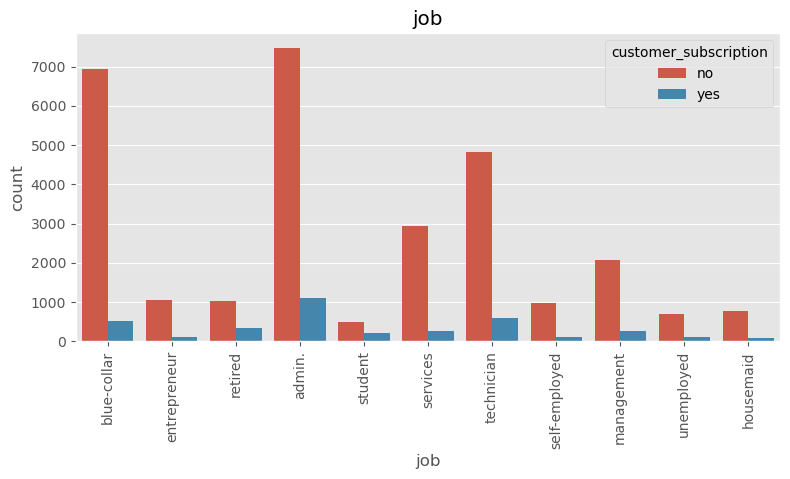

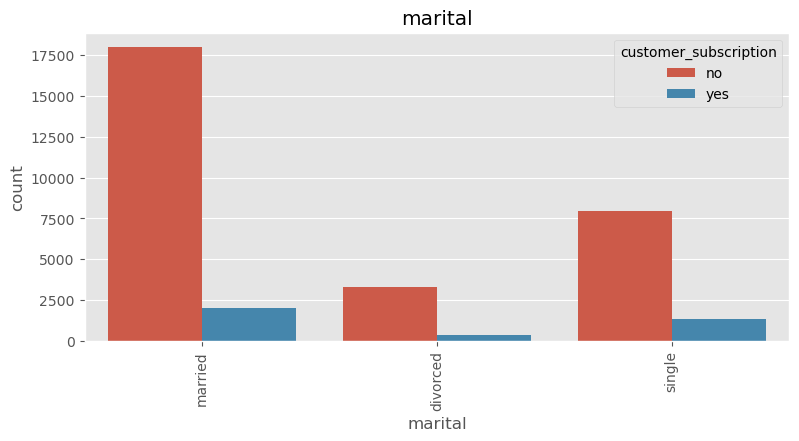

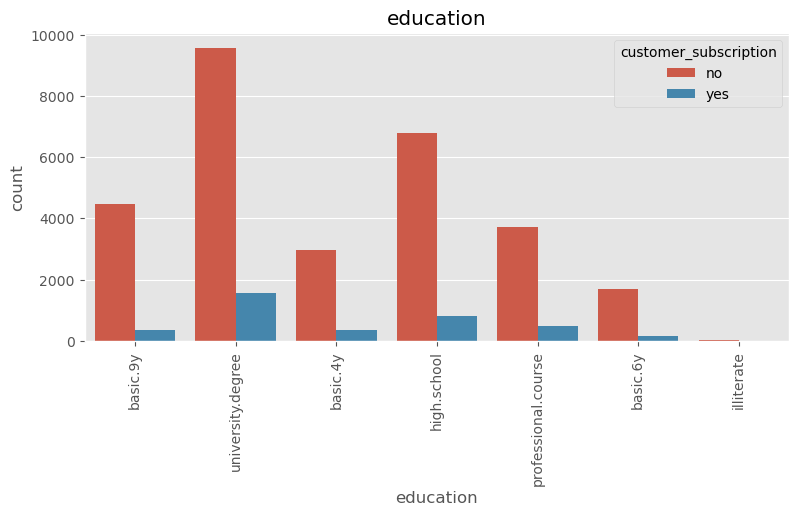

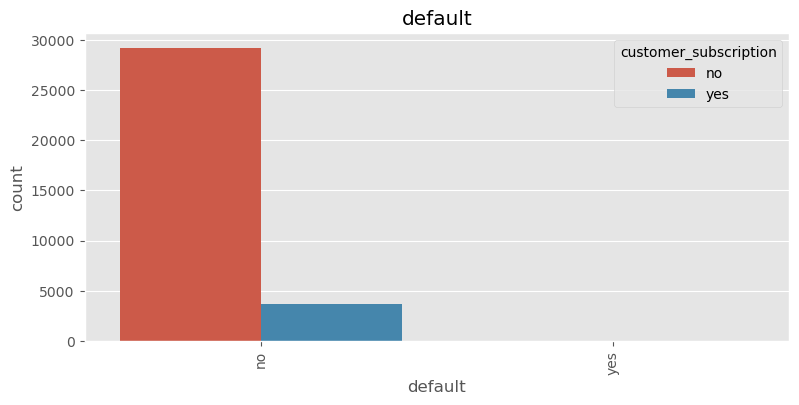

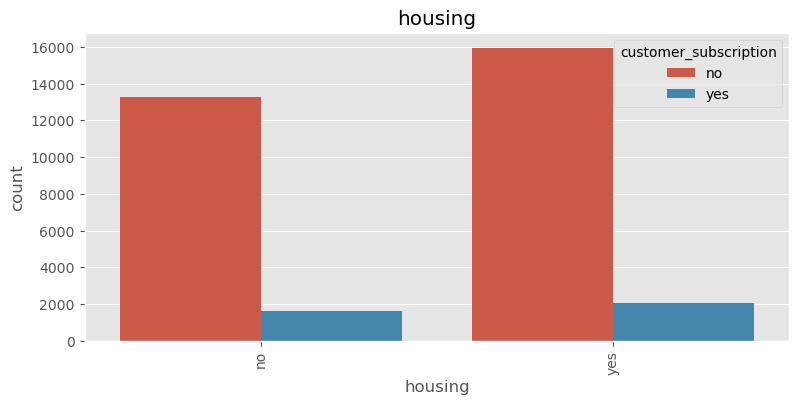

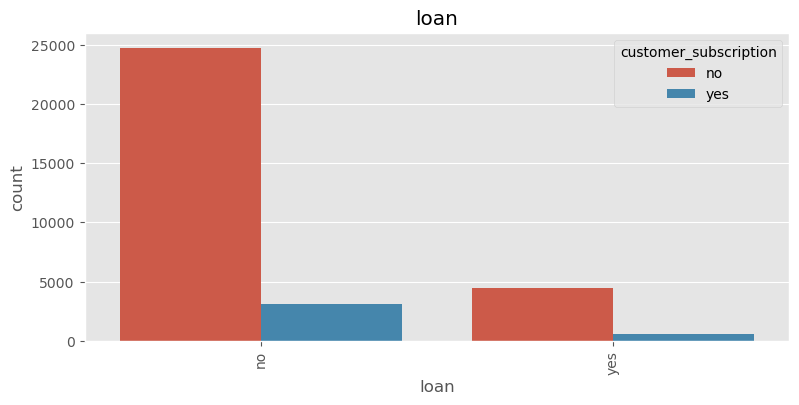

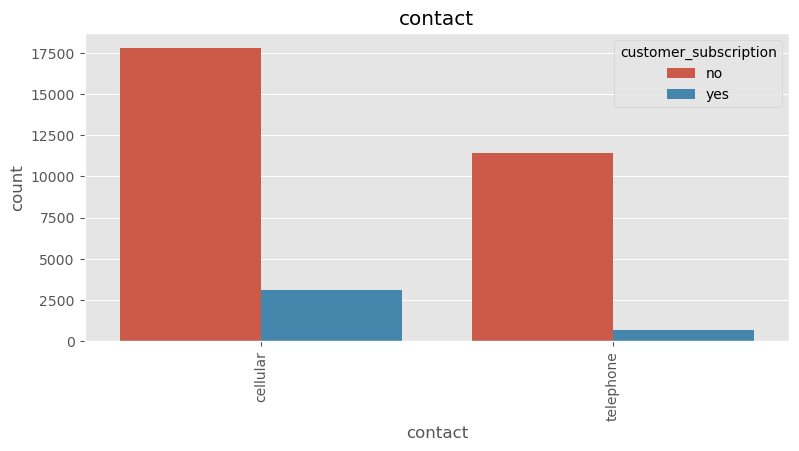

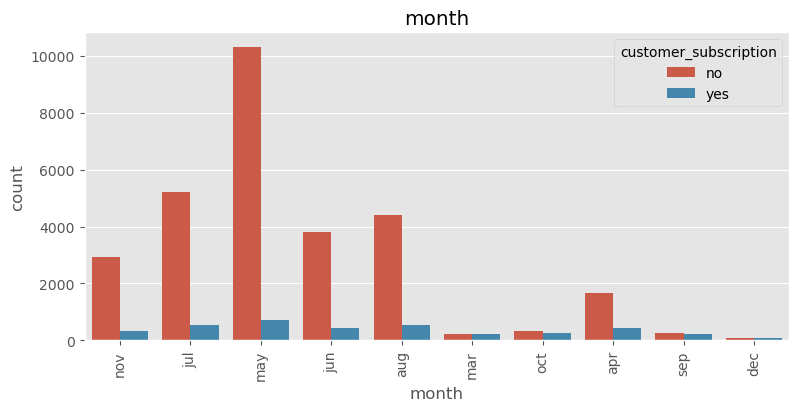

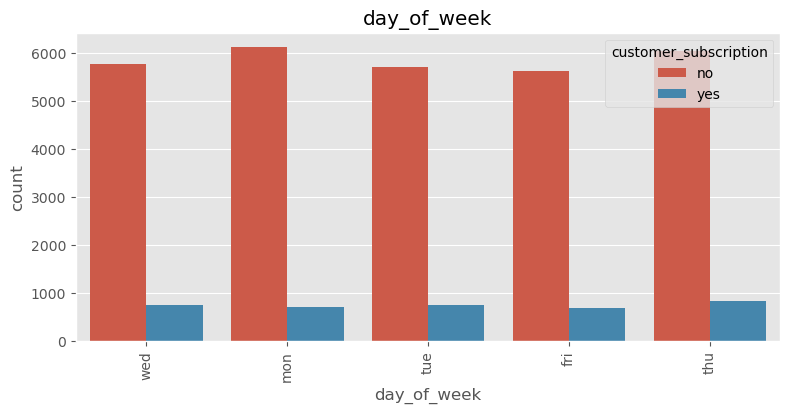

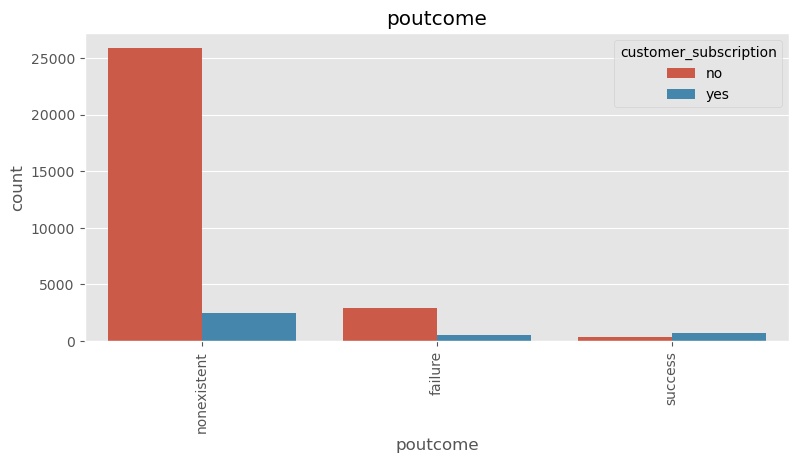

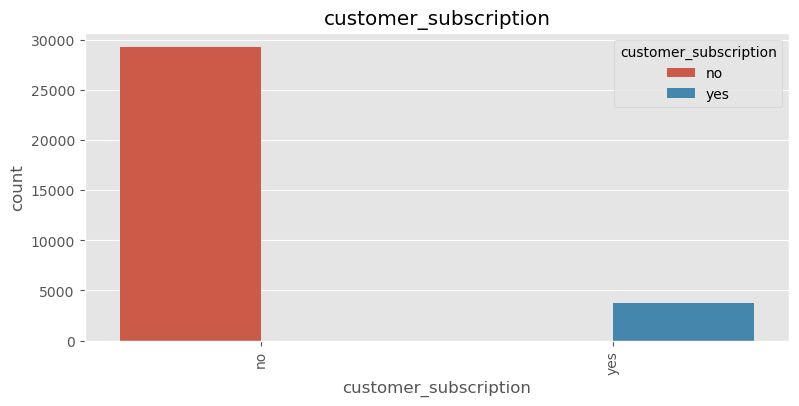

In [28]:
plt.style.use("ggplot")
for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x= data[column], hue=data["customer_subscription"])
    plt.title(column)
    plt.xticks(rotation=90)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    32950 non-null  int64 
 1   job                    32950 non-null  object
 2   marital                32950 non-null  object
 3   education              32950 non-null  object
 4   default                32950 non-null  object
 5   housing                32950 non-null  object
 6   loan                   32950 non-null  object
 7   contact                32950 non-null  object
 8   month                  32950 non-null  object
 9   day_of_week            32950 non-null  object
 10  duration               32950 non-null  int64 
 11  campaign               32950 non-null  int64 
 12  pdays                  32950 non-null  int64 
 13  previous               32950 non-null  int64 
 14  poutcome               32950 non-null  object
 15  customer_subscripti

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()
for item in cat_var:
    data[item] = le.fit_transform(data[item])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,customer_subscription
0,49,1,1,2,0,0,0,0,7,4,227,4,999,0,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,999,0,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1,0


In [57]:
data.isna().sum()

age                      0
job                      0
marital                  0
education                0
default                  0
housing                  0
loan                     0
contact                  0
month                    0
day_of_week              0
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome                 0
customer_subscription    0
dtype: int64

Text(0.5, 1.0, 'Correlation w.r.t customer_subscription')

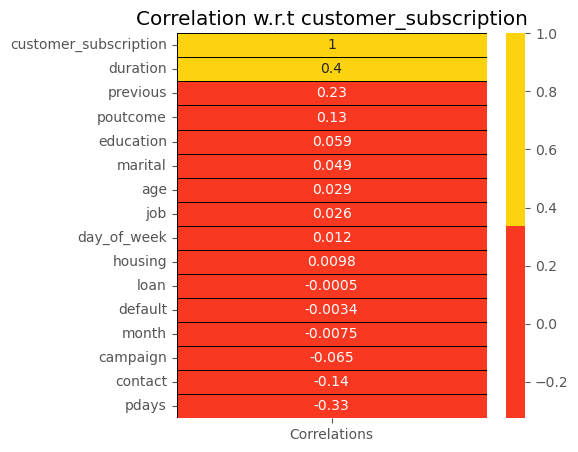

In [58]:
colors = ['#F93822','#FDD20E']
corr = data.corrwith(data['customer_subscription']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black')
plt.title('Correlation w.r.t customer_subscription')

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
num_var

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [61]:
scaler = StandardScaler()
scaler.fit(data[num_var])
data_scaled = scaler.transform(data[num_var])
columns_value_new = data[num_var].columns
data_scaled_ok = pd.DataFrame(data_scaled, columns = columns_value_new)
data_scaled_ok.head(10)

,age,duration,campaign,pdays,previous
0,0.863739,-0.120196,0.522981,0.196584,-0.350127
1,-0.289722,-0.216732,-0.203688,0.196584,1.653813
2,3.651268,3.436173,-0.567023,0.196584,-0.350127
3,-0.385843,-0.533368,-0.203688,0.196584,-0.350127
4,1.824956,0.424264,-0.203688,0.196584,-0.350127
5,-1.058695,-0.008215,-0.203688,0.196584,-0.350127
6,-1.347060,0.737039,-0.567023,0.196584,-0.350127
7,-0.962573,-0.510200,-0.203688,0.196584,-0.350127
8,0.959860,1.219717,-0.567023,0.196584,-0.350127
9,-0.674208,0.926249,0.886316,0.196584,-0.350127


In [62]:
data1 = data.drop(num_var, axis =1) 
result = pd.concat([data_scaled_ok, data1], axis=1, join='inner')
display(result)

,age,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,customer_subscription
0,0.863739,-0.120196,0.522981,0.196584,-0.350127,1,1,2,0,0,0,0,7,4,1,0
1,-0.289722,-0.216732,-0.203688,0.196584,1.653813,2,1,6,0,0,0,1,7,4,0,0
2,3.651268,3.436173,-0.567023,0.196584,-0.350127,5,1,0,0,0,0,0,3,1,1,1
3,-0.385843,-0.533368,-0.203688,0.196584,-0.350127,0,1,6,0,1,0,1,6,1,1,0
4,1.824956,0.424264,-0.203688,0.196584,-0.350127,5,0,6,0,0,0,0,4,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,-1.154817,-0.255346,-0.567023,0.196584,-0.350127,7,2,3,0,1,0,0,3,3,1,0
32946,1.152104,-0.749608,-0.567023,0.196584,1.653813,9,1,5,0,1,0,0,7,0,0,0
32947,1.344347,-0.490893,0.522981,0.196584,-0.350127,0,1,2,0,0,1,0,3,1,1,0
32948,-1.058695,-0.359604,-0.567023,0.196584,-0.350127,0,1,6,0,0,0,1,6,0,1,0


In [63]:
X = result.drop(columns=['customer_subscription'])
y = result.filter(['customer_subscription'], axis =1)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [65]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [77]:
def model(classifier):
    
    classifier.fit(X_res,y_res)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,X_res,y_res,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, prediction)  # Update this line
    plt.plot(fpr, tpr)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    print(labels)
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(X_test)))

In [78]:
logistic_model = LogisticRegression(random_state=42, max_iter=3000)

Accuracy :  83.85%
Cross Validation Score :  90.20%
ROC_AUC Score :  79.17%


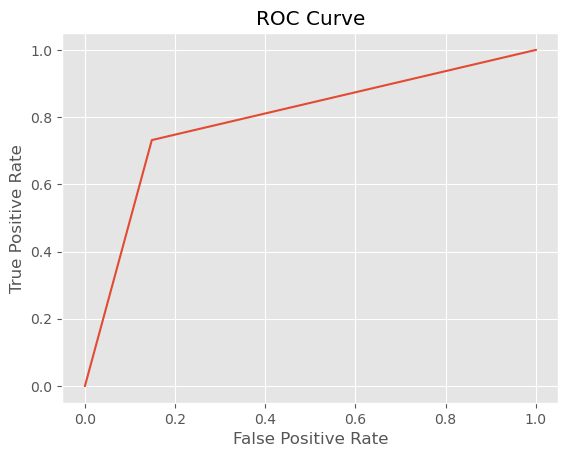

In [79]:
model(logistic_model)

In [80]:
X_test

,age,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
15832,-1.058695,-0.460001,-0.203688,0.196584,-0.350127,1,1,6,0,0,0,1,4,0,1
32386,0.190887,-0.243762,0.886316,0.196584,-0.350127,1,2,2,0,1,0,1,6,3,1
11108,1.728834,-0.386634,-0.567023,0.196584,-0.350127,1,0,0,0,1,0,0,3,2,1
26449,-0.097478,-0.649211,-0.203688,0.196584,-0.350127,0,1,6,0,1,0,0,1,2,1
3319,-0.289722,-0.317129,-0.203688,0.196584,-0.350127,4,1,6,0,1,1,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16397,-1.058695,-0.730301,-0.203688,0.196584,-0.350127,4,1,2,0,0,0,0,7,4,1
20267,-1.058695,-0.583567,-0.203688,-5.102747,1.653813,0,2,3,0,1,0,0,9,3,2
12146,0.767617,2.849237,-0.203688,0.196584,-0.350127,1,1,5,0,1,0,0,1,3,1
20639,-1.443182,0.096043,0.886316,0.196584,-0.350127,1,1,2,0,1,0,1,4,1,1


['True Neg\n4997\n75.83%', 'False Pos\n870\n13.20%', 'False Neg\n194\n2.94%', 'True Pos\n529\n8.03%']
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      5867
           1       0.38      0.73      0.50       723

    accuracy                           0.84      6590
   macro avg       0.67      0.79      0.70      6590
weighted avg       0.90      0.84      0.86      6590



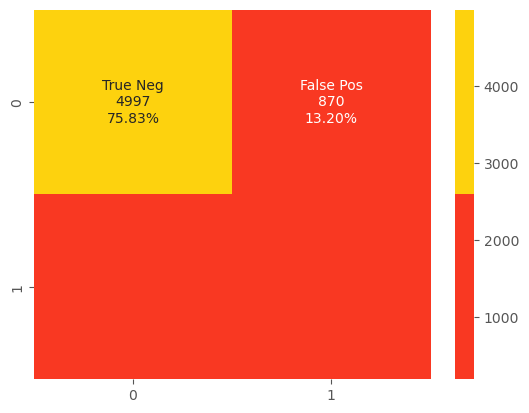

In [81]:
model_evaluation(logistic_model)

In [82]:
X_test.shape

(6590, 15)

In [83]:
X_train.shape

(26360, 15)

In [84]:
X_res.shape

(46742, 15)